In [1]:
import numpy as np
import torch
from MCMC.BayesQuantile import BQR
import matplotlib.pyplot as plt
from Optimization.CD import SQR
from scipy.linalg import toeplitz

In [2]:
N=500
P=1000
Corr=0.5**toeplitz(np.arange(0,P),np.arange(0,P))
beta=np.zeros((P,1))
beta[0]=3
beta[1]=1.5
beta[4]=2
beta[9]=1
beta[12]=1
beta[18]=0.5
beta[25]=-0.5
beta[30]=2.0
beta[45]=-1.2
beta[50]=-1
Z=np.random.binomial(1,0.8,(N,1))
X=np.random.multivariate_normal(np.zeros(P), Corr, N)
sigma1=1
sigma2=6
Y=X@beta+(Z*sigma1+(1-Z)*sigma2)*np.random.randn(N,1)

In [3]:
device1 = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
# Simulation
beta_sample=BQR(torch.from_numpy(Y).to(device1),torch.from_numpy(X).to(device1),1,1,1,Q=0.5)

100%|██████████| 19999/19999 [00:35<00:00, 564.34it/s]


In [5]:
# Optimization
beta_estimator,beta_path=SQR(torch.from_numpy(Y).to(device1),torch.from_numpy(X).to(device1),Q=0.5,C=0.5,s=1,path=True)

In [6]:
beta_mean=beta_sample.mean(axis=0)

In [7]:
beta_mean

tensor([ 2.9808e+00,  1.3726e+00,  3.5294e-03,  1.2928e-02,  1.9339e+00,
        -1.2177e-02, -3.2224e-03, -1.9895e-02,  8.0868e-03,  8.5652e-01,
        -1.8372e-02,  3.3231e-02,  8.9544e-01,  9.9094e-03,  3.4808e-03,
        -5.9435e-03,  5.2791e-03,  1.3567e-02,  3.6855e-01,  5.6940e-02,
         5.5868e-03, -2.2440e-02, -1.4601e-03, -7.0524e-03,  7.1557e-03,
        -3.8956e-01, -8.5141e-03,  6.6532e-04, -1.0960e-02, -1.2178e-02,
         1.9366e+00,  8.1663e-03, -7.2636e-03,  1.4091e-02,  1.3222e-02,
        -6.8726e-03,  1.5816e-02,  2.3011e-02,  3.6478e-02,  1.0097e-02,
        -6.5632e-04,  4.3936e-03,  7.2733e-03, -1.5832e-03, -1.6030e-02,
        -1.0438e+00, -2.1079e-02, -3.1077e-03,  7.4271e-03, -3.3315e-02,
        -9.9468e-01, -1.5582e-02, -9.5387e-03, -1.0798e-02, -1.5065e-02,
        -2.2012e-02,  7.1188e-03, -5.5506e-04,  1.3577e-03, -4.2014e-03,
        -1.5290e-02,  1.3952e-02, -2.0143e-03, -1.6617e-02,  3.4664e-03,
        -2.9374e-02, -3.5887e-02, -1.9669e-02,  1.3

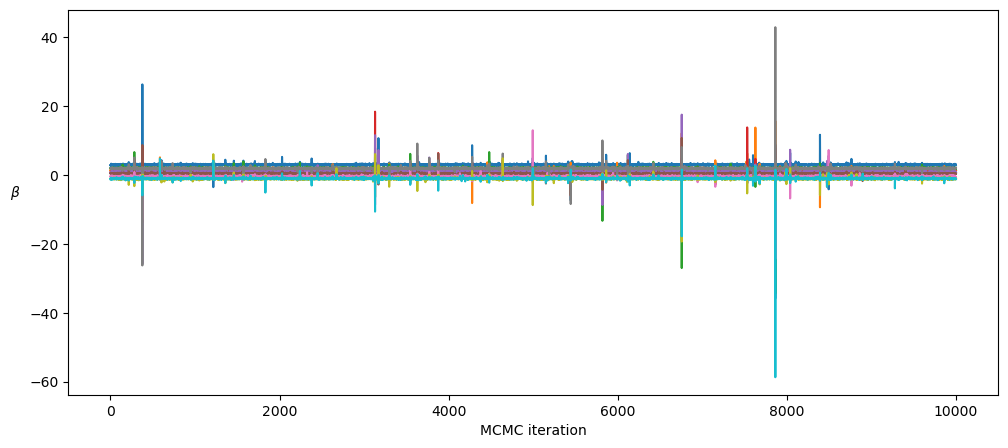

In [8]:
plt.figure(figsize=(12, 5))
plt.rcParams['font.size'] = 10

plt.plot(beta_sample[:,[0, 1, 4, 9,12,18,25,30,45,50]].cpu().numpy())
plt.xlabel('MCMC iteration')
plt.ylabel(r'$\beta$', rotation=0, labelpad=10)
plt.show()

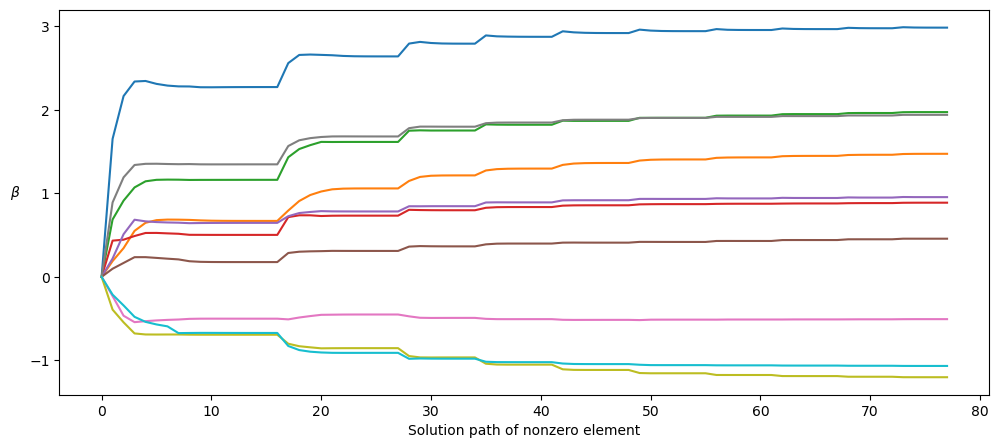

In [9]:
plt.figure(figsize=(12, 5))
plt.rcParams['font.size'] = 10

plt.plot(beta_path[:,[0, 1, 4, 9,12,18,25,30,45,50]])
plt.xlabel('Solution path of nonzero element')
plt.ylabel(r'$\beta$', rotation=0, labelpad=10)
plt.show()